# PCA and eigenfaces

In this question we will perform and analyze PCA on a dataset consisting of images of faces

In [4]:
from sklearn import datasets
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import ImageFile
from PIL import Image

In [5]:
from IPython.display import display
from PIL import Image

In [22]:
#import ssl

#ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
dataset = sklearn.datasets.fetch_lfw_people()
X = dataset['data']

In [36]:
X.shape # this contains 13,233 images of faces, each with 2914 pixels

(13233, 2914)

## 4a

QUESTION: Plot the first 20 images to get familiar with the dataset.

In [68]:
# plots the first 20 faces of the dataset
def plot_20_faces(X):
    for i in range(20):
        plt.subplot(4, 5, i+1)
        plt.imshow(np.reshape(X[i], (62, 47)), cmap=plt.cm.gray)

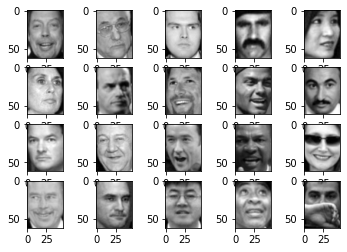

In [41]:
plot_20_faces(X)

## 4b

QUESTION: Recall that in order to perform PCA, we must first center our data. Compute the average face
of the dataset, center the data, and plot the average face.

In [8]:
average = X.mean(axis=0) # compute the average face
centered = X - average # center all the faces

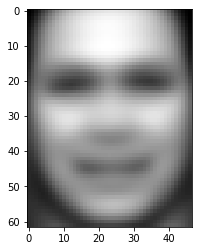

In [31]:
plt.imshow(np.reshape(average, (62, 47)), cmap=plt.cm.gray) # plot the average face

## 4c

QUESTION: Perform PCA on the dataset. Plot the first 20 images reconstructed after being projected onto
the top 10 principal components (PCs). Do the same after projecting onto the top 100 PCs and
the top 1000 PCs.

In [34]:
u, s, vT = np.linalg.svd(centered)

In [35]:
smat = np.diagflat(s)
u.shape, s.shape, smat.shape, vT.shape

((13233, 13233), (2914,), (2914, 2914), (2914, 2914))

In [50]:
# perform PCA (on the first k PCs)
def perform_PCA(u, smat, vT, k):
    projected_X = u[:, :k] @ smat[:k, :k]
    reconstructed_X = projected_X @ vT[:k, :]
    
    return reconstructed_X

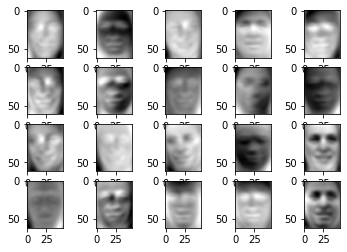

In [53]:
# k = 10
plot_20_faces(perform_PCA(u, smat, vT, 10))

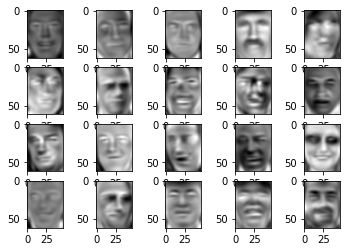

In [54]:
# k = 100
plot_20_faces(perform_PCA(u, smat, vT, 100))

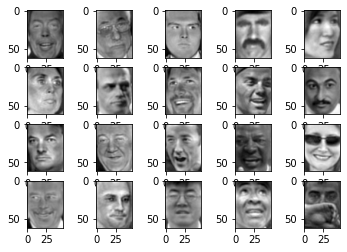

In [55]:
# k = 1000
plot_20_faces(perform_PCA(u, smat, vT, 1000))

## 4d

QUESTION: For this dataset, we refer to the PCs as “eigenfaces”. Plot the top 20 eigenfaces.

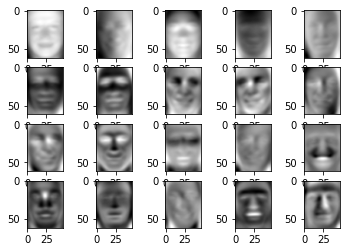

In [56]:
#plot the first 20 eigenfaces. 1 eigenface is 1 row of vT (from the SVD)
plot_20_faces(vT) # plots the first 20 rows of vT

## 4e

QUESTION: Recall from lecture that we can compute the percent variance explained by a certain number
of PCs by using the eigenvalues of the covariance matrix. Plot the percent variance explained
as a function of the number of PCs and determine how many PCs are needed to explain 95%
of the variance.

In [62]:
# find eigenvalues of covariance matrix X.T @ X
cov = centered.T @ centered
evals, evecs = np.linalg.eig(cov)

In [64]:
ordered_evals = np.sort(evals)[::-1]
sum_of_evals = np.sum(ordered_evals)
normalized_evals = [x/sum_of_evals for x in ordered_evals]

Text(0.5, 1.0, 'Percent variance explained as a function of # of PCs')

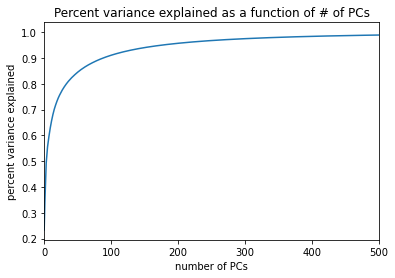

In [69]:
cumsumevals = np.cumsum(normalized_evals) # a cumulative list of the % variance explained by successively decreasing
                                          # PCs

# make plot
plt.plot(cumsumevals)
plt.xlim([0, 500])
plt.xlabel('number of PCs')
plt.ylabel('percent variance explained')
plt.title('Percent variance explained as a function of # of PCs')

In [66]:
# find the number of PCs needed to explain 95% of the variance
np.where(cumsumevals > .95)[0][0] + 1 # need to count the 0th index, hence the +1

177

The 177 PCs with the largest eigenvalues are needed to explain 95% of the variance

## 4f

QUESTION: Use the first 80% of the dataset as your training set and the remaining 20% as the test set. We
will use the training set to compute the PCs and we will evaluate our reconstruction loss on both
the training and test set. For the following number of PCs, [10, 20, 50, 100, 500, 1000, 2914],
perform PCA using the training set and compute the average reconstruction loss for both the
training and test set. Plot the error for both the training and test set as a function of the number
of PCs.

In [83]:
SPLIT = 0.8
n_train = int(centered.shape[0] * SPLIT)

X_train = centered[:n_train, :]
X_test = centered[n_train:, :]

In [84]:
X_train.shape, X_test.shape

((10586, 2914), (2647, 2914))

In [73]:
u_train, s_train, vT_train = np.linalg.svd(X_train)

In [75]:
smat_train = np.diagflat(s_train)
u_train.shape, s_train.shape, smat_train.shape, vT_train.shape

((10586, 10586), (2914,), (2914, 2914), (2914, 2914))

In [78]:
PCs = [10, 20, 50, 100, 500, 1000, 2914]
vs = []
vTs = []

for k in PCs:
    vTs.append(vT_train.T[:, :k])

In [80]:
# training data
loss_train = []
for k in PCs:
    projected_X = u_train[:, :k] @ smat_train[:k, :k]
    reconstructed_X = projected_X @ vT_train[:k, :]
    loss = np.linalg.norm(reconstructed_X - X_train)
    loss_train.append(loss)

In [81]:
loss_train

[141453.7, 120118.68, 91939.94, 69542.445, 23973.535, 11005.202, 0.081393816]

In [88]:
k = 10
projected_X = X_test @ vT_train.T[:, :k]
projected_X.shape, vT_train[:k, :].shape

((2647, 10), (10, 2914))

In [90]:
# test data
loss_test = []
for k in PCs:
    projected_X = X_test @ vT_train.T[:, :k]
    reconstructed_X = projected_X @ vT_train[:k, :]
    loss = np.linalg.norm(reconstructed_X - X_test)
    loss_test.append(loss)

In [91]:
loss_test

[70724.805, 60049.58, 46170.227, 35135.832, 12875.796, 6428.2456, 0.050156306]

Text(0.5, 1.0, 'Reconstruction loss as a function of # of PCs')

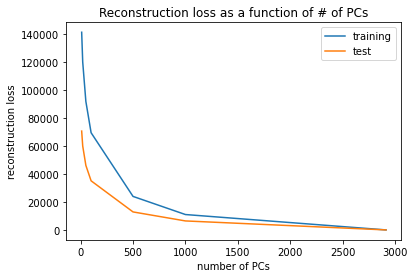

In [95]:
plt.plot(PCs, loss_train, label = 'training')
plt.plot(PCs, loss_test, label = 'test')
plt.legend()
plt.xlabel('number of PCs')
plt.ylabel('reconstruction loss')
plt.title('Reconstruction loss as a function of # of PCs')